In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

In [29]:
df = pd.read_csv('HR_comma_sep.csv')

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
# Preprocess categorical variables (sales and salary) using LabelEncoder
# هنا مهم نحول الى ارقام لكن في شجرة القرار مو ضروري هالخطوة لانها تقدر تتعامل مع البيانات النصية  
label_encoder = LabelEncoder()
df['sales'] = label_encoder.fit_transform(df['sales'])
df['salary'] = label_encoder.fit_transform(df['salary'])

In [5]:
X = df.drop('left',axis=1)
y = df[['left']]
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-Nearest Neighbours

In [6]:
# Standardize the features (optional but recommended for k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [8]:
# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled)

C:\Users\rofid\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9533333333333334


In [10]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.90      0.91      0.90       706

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



## Decision Tree

In [11]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7],  # Specify the range of values for max_depth
    'min_samples_leaf': [3, 5, 7, 9]  # Specify the range of values for min_samples_leaf
}

In [12]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [3, 5, 7, 9]})

In [13]:
print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3}


In [14]:
best_clf = grid_search.best_estimator_

In [15]:
y_pred = best_clf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9753333333333334


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2274   20]
 [  54  652]]


In [18]:
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.97      0.92      0.95       706

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



## Support Vector Machine

In [19]:
ml = svm.SVC(probability=True)

param_grid = {'C': [1, 10, 100, 1000, 10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

random_s = RandomizedSearchCV(estimator=ml, param_distributions=param_grid, n_iter=10, cv=5, verbose=1, n_jobs=-1)

random_search=random_s.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\rofid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
print(random_search.best_params_)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}


In [21]:
accuracy = random_search.best_score_

In [22]:
accuracy

0.9638305196609698

In [23]:
y_test_hat = random_s.predict(X_test)

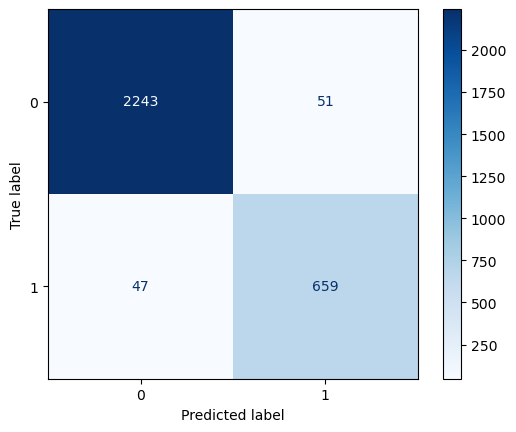

In [24]:
confusion_mat = confusion_matrix(y_test, y_test_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=random_s.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

In [25]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2294
           1       0.93      0.93      0.93       706

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



## Ensamble method

In [26]:
#Ensamble method
VotingClassifierModel = VotingClassifier(
 estimators=[('K-Nearest Neighbours', knn_classifier),
             ('Support Vector Machine', random_search),
('Decision Tree', grid_search)],
 voting='soft')
VotingClassifierModel.fit(X_train, y_train)

# Predict on the test set
y_pred = VotingClassifierModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\rofid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rofid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Ensemble Model Accuracy: 0.972
